In [1]:
#Importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#Leemos la base
flight = pd.read_csv('flights.csv', 
                     dtype={'YEAR': 'int', 
                           'MONTH': 'int',
                            'DAY': 'int',
                            'DAY_OF_WEEK': 'int',
                            'FLIGHT_NUMBER': 'int',
                            'SCHEDULED_DEPARTURE': 'int',
                            'AIRLINE': 'str',
                            'ORIGIN_AIRPORT': 'str',
                            'DESTINATION_AIRPORT': 'str'                    
                           })

In [3]:
#Visualizamos la base
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Conocemos la información de las variables
flight.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [5]:
#Revisamos el porcentaje de Nulos que hay en la base
flight.isnull().sum()/len(flight)*100

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [6]:
#Hay columnas que no son utiles ni necesarias para el propósto que tenemos con el Dataset
flight=flight.drop(['YEAR','FLIGHT_NUMBER','TAIL_NUMBER','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1)

In [7]:
#Revisamoa nuevamente que las variables no tengan más del 80% de los datos Nulos
flight.isnull().sum()/len(flight)*100

MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         1.480526
DEPARTURE_DELAY        1.480526
TAXI_OUT               1.530259
WHEELS_OFF             1.530259
SCHEDULED_TIME         0.000103
ELAPSED_TIME           1.805629
AIR_TIME               1.805629
DISTANCE               0.000000
WHEELS_ON              1.589822
TAXI_IN                1.589822
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           1.589822
ARRIVAL_DELAY          1.805629
DIVERTED               0.000000
CANCELLED              0.000000
dtype: float64

In [8]:
# Eliminar las filas donde al menos un dato sea nulo
flight = flight.dropna() 

In [9]:
flight.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [10]:
flight.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED'],
      dtype='object')

In [11]:
#Eliminamos el Target para el análisis de la correlación
Cancelled=flight['CANCELLED']
flight = flight.drop(['CANCELLED'],
                     axis=1
                    )

In [19]:
flight.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,DIVERTED
0,1,1,4,AS,ANC,SEA,2354.0,-11.0,21.0,1448,4.0,430,0
1,1,1,4,AA,LAX,PBI,2.0,-8.0,12.0,2330,4.0,750,0
2,1,1,4,US,SFO,CLT,18.0,-2.0,16.0,2296,11.0,806,0
3,1,1,4,AA,LAX,MIA,15.0,-5.0,15.0,2342,8.0,805,0
4,1,1,4,AS,SEA,ANC,24.0,-1.0,11.0,1448,5.0,320,0


MemoryError: 

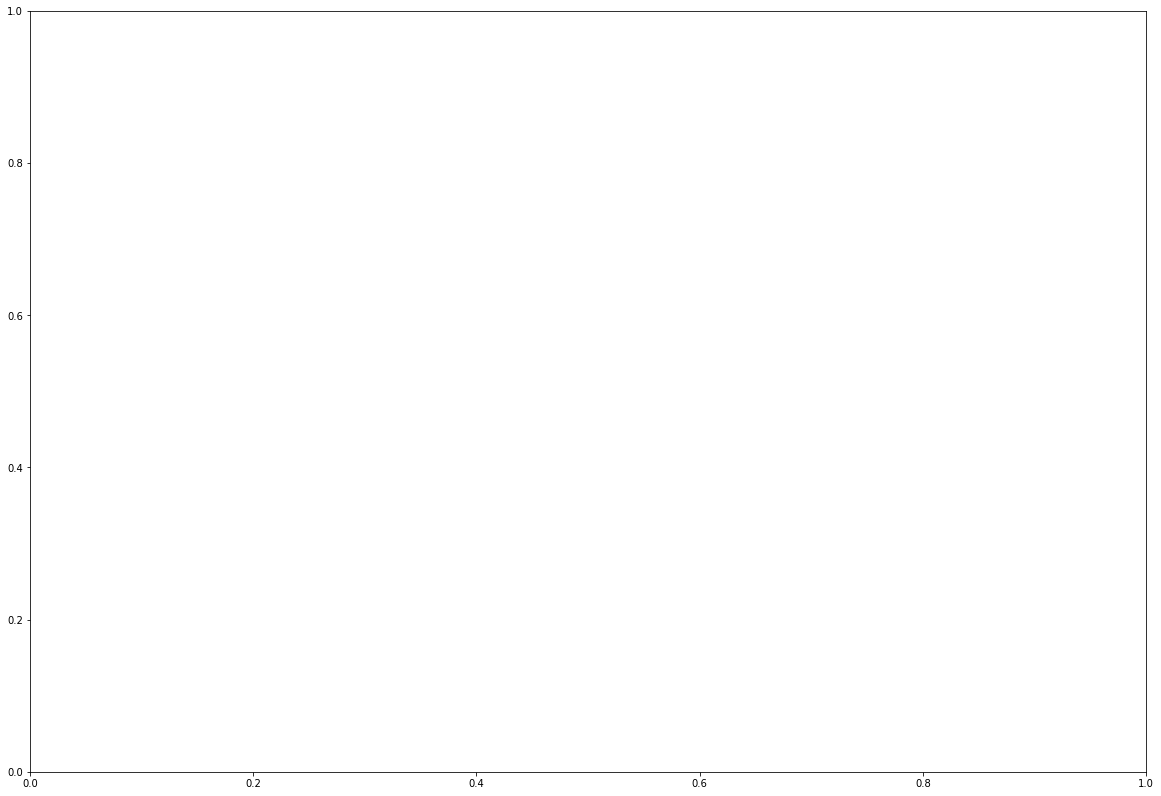

In [20]:
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(flight.corr(), annot = True)
plt.show()

In [14]:
flight = flight.drop(
    ['WHEELS_OFF', 'SCHEDULED_DEPARTURE', 'ARRIVAL_DELAY', 'WHEELS_ON', 'SCHEDULED_TIME', 
     'ELAPSED_TIME', 'AIR_TIME','ARRIVAL_TIME'], 
    axis=1)

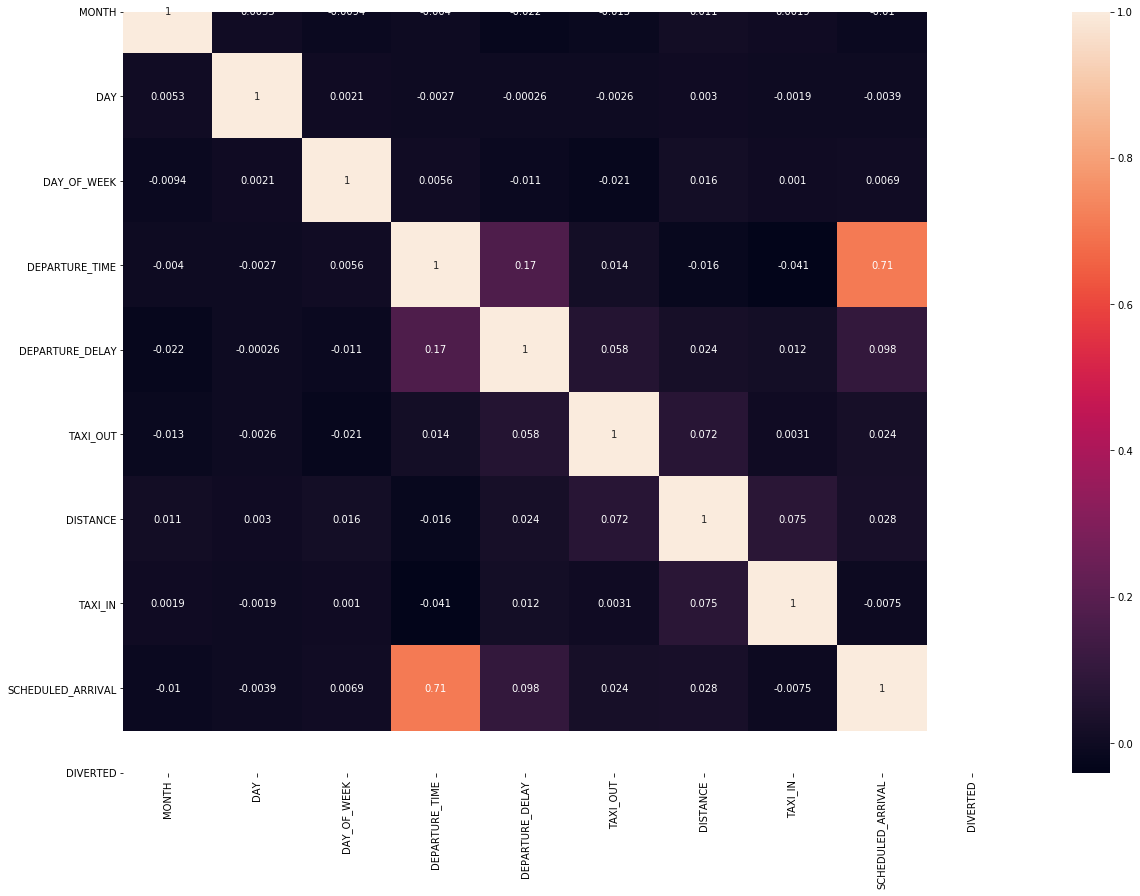

In [15]:
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(flight.corr(), annot = True)
plt.show()

In [18]:
### Codificacion de variables categoricas
vbls_encode = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
encoder = LabelEncoder()

flight_encoder = flight.copy()

flight_category = flight[vbls_encode].apply(encoder.fit_transform)

flight_encoder = flight_encoder.drop(vbls_encode, axis=1).join(flight_category)
flight_encoder.head()

MemoryError: 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
pca_result = pca.fit_transform(flight_encoder)
pca_result